pay:1,3 destress:1,4 workstress:1 home:15 commutestress:2

Statistics for strategy work-first:
- 63.53% of players ended with >= 0 money.
- Average money: 0.99
- Standard deviation: 4.29


Statistics for strategy balanced:
- 84.75% of players ended with >= 0 money.
- Average money: 6.76
- Standard deviation: 6.91


Statistics for strategy work-more:
- 40.99% of players ended with >= 0 money.
- Average money: -2.12
- Standard deviation: 7.14



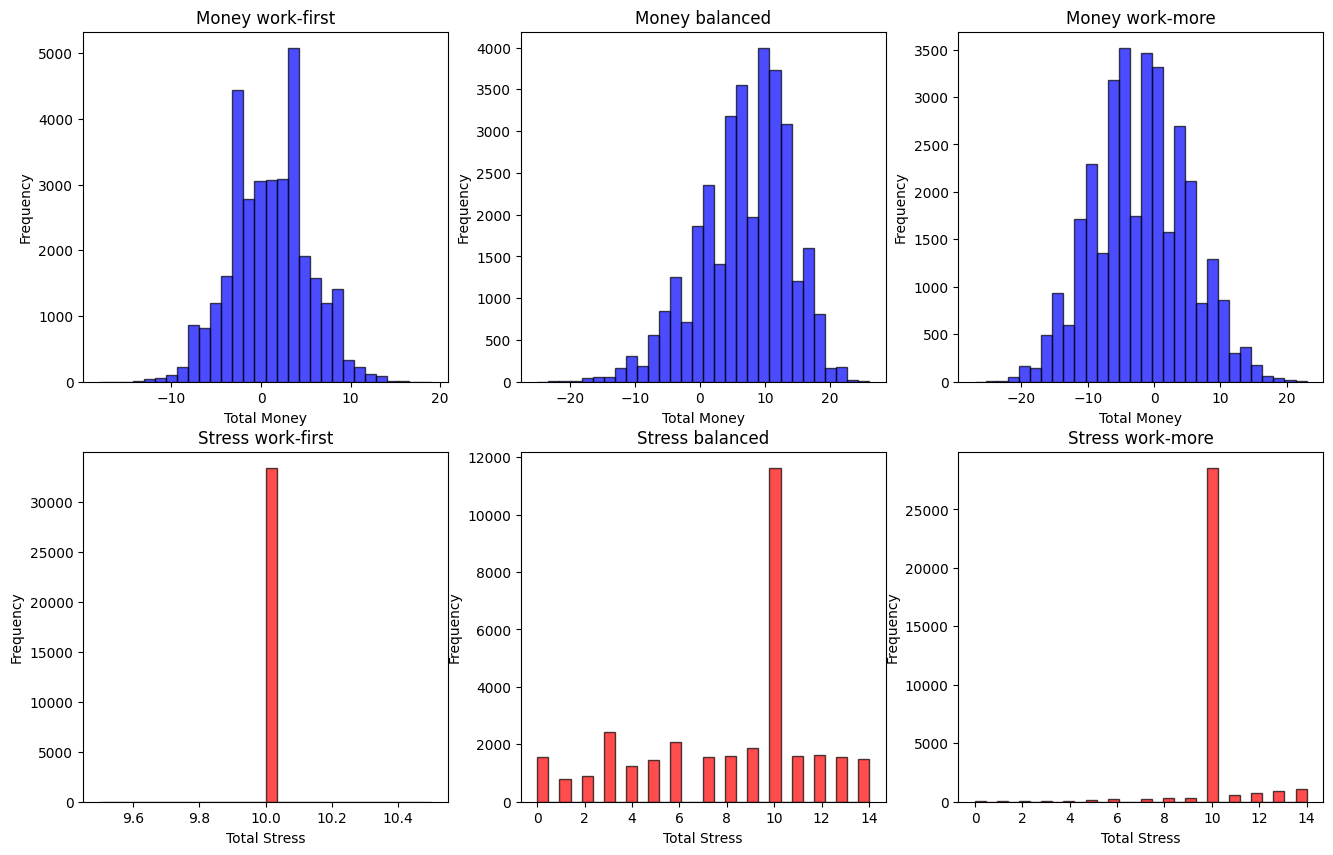

pay:1,3 destress:1,4 workstress:1 home:22 commutestress:1

Statistics for strategy work-first:
- 85.16% of players ended with >= 0 money.
- Average money: 4.02
- Standard deviation: 4.31


Statistics for strategy balanced:
- 97.11% of players ended with >= 0 money.
- Average money: 8.87
- Standard deviation: 4.71


Statistics for strategy work-more:
- 70.31% of players ended with >= 0 money.
- Average money: 3.40
- Standard deviation: 6.97



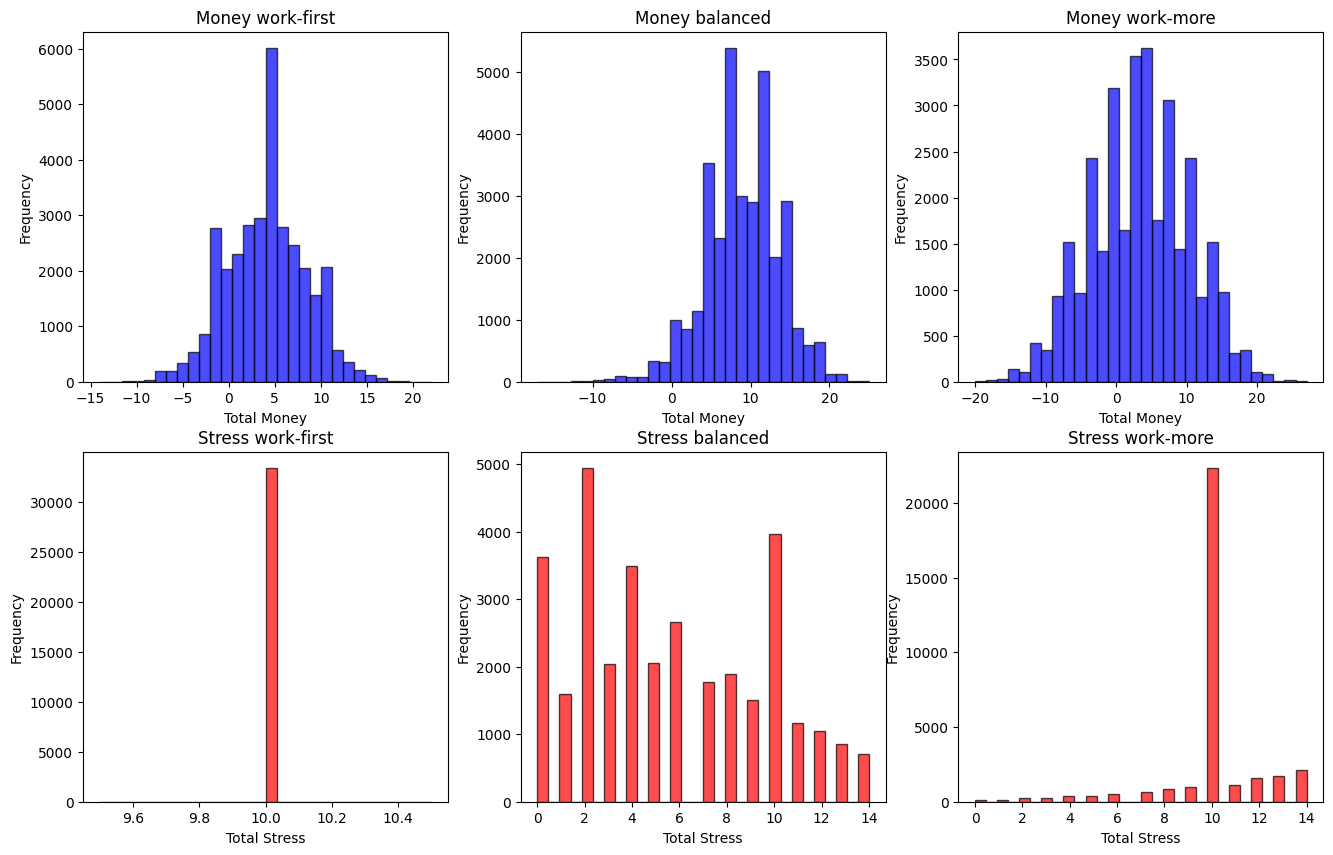

pay:1,3 destress:1,4 workstress:1 home:33 commutestress:0

Statistics for strategy work-first:
- 79.12% of players ended with >= 0 money.
- Average money: 3.00
- Standard deviation: 4.28


Statistics for strategy balanced:
- 78.26% of players ended with >= 0 money.
- Average money: 2.95
- Standard deviation: 4.32


Statistics for strategy work-more:
- 96.62% of players ended with >= 0 money.
- Average money: 8.74
- Standard deviation: 5.06



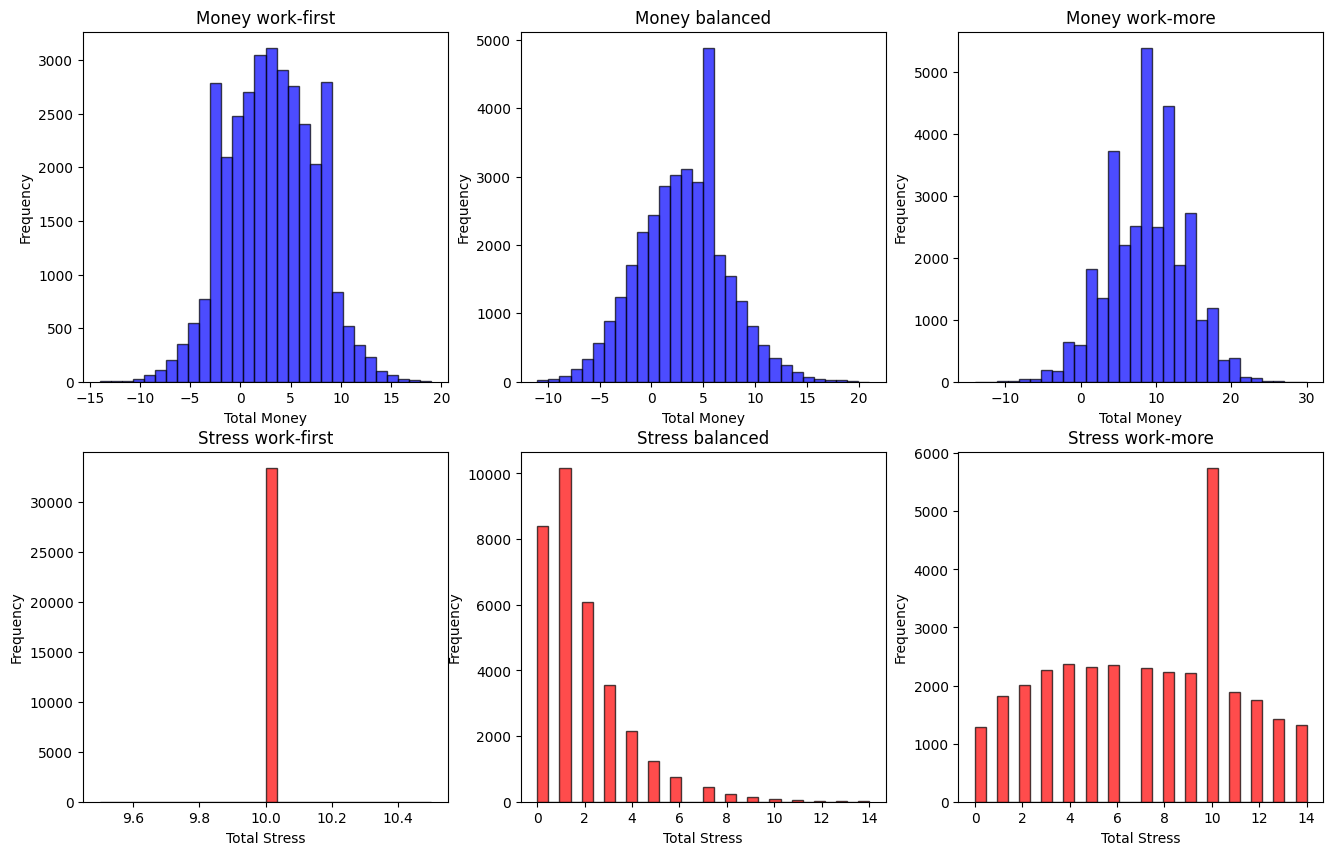

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

class Player:
    def __init__(self, job_pay_range, destress_range, work_stress_gain, commute_stress, house_rent, strat):
        self.money = 0
        self.stress = 0
        self.days_worked = 0
        self.job_pay_range = job_pay_range
        self.destress_range = destress_range
        self.work_stress_gain = work_stress_gain
        self.commute_stress = commute_stress
        self.house_rent = house_rent
        self.strategy = strat


    def work(self):
        pay = random.randint(self.job_pay_range[0], self.job_pay_range[1])
        self.money += pay
        self.stress += self.work_stress_gain + self.commute_stress
        self.days_worked += 1

    def destress(self):
        reduction = random.randint(self.destress_range[0], self.destress_range[1])
        self.stress = max(0, self.stress - reduction)

    def check_stress_limit(self):
        if self.stress >= 15:
            self.stress = 10
            self.money -= 10

def simulate_game(weeks=4, job_pay_range=(1,2),
                    destress_range=(1,2),
                    work_stress_gain=0,
                    commute_stress=0,
                    house_rent=40,
                    strategy='balanced'):
        results = []
        player = Player(job_pay_range, destress_range, work_stress_gain, commute_stress, house_rent, strategy)
        for week in range(weeks):
            for day in range(7):
                if player.strategy == 'work-first' or (player.strategy == 'balanced' and random.random() < 0.5) or (player.strategy == 'work-more' and random.random() < 0.75):
                    player.work()
                elif (player.stress == 0):
                    player.work()
                else:
                  player.destress()

            player.check_stress_limit()

        player.money -= player.house_rent
        results.append({
            'money': player.money,
            'stress': player.stress,
            'job_pay_range': player.job_pay_range,
            'destress_range': player.destress_range,
            'work_stress_gain': player.work_stress_gain,
            'commute_stress': player.commute_stress,
            'house_rent': player.house_rent,
            'strategy': player.strategy
        })

        return results


def run_simulations(n=10000):
    job_pay_ranges = [(1,3)]
    destress_ranges = [(1,4)]
    work_stress_gains = [1]
    house_rents = [(15,2),(22,1),(33,0)]

    strategies = ['work-first', 'balanced', 'work-more']

    all_results = {
        strategy: {
            f'pay:{j[0]},{j[1]} destress:{d[0]},{d[1]} workstress:{ws} home:{h[0]} commutestress:{h[1]}': []
            for j, d, ws, h in product(job_pay_ranges, destress_ranges, work_stress_gains, house_rents)
        }
        for strategy in strategies
    }

    for strategy in strategies:
        for job_pay_range, destress_range, work_stress_gain, house_rent_tuple in product(job_pay_ranges, destress_ranges, work_stress_gains, house_rents):
            commute_stress = house_rent_tuple[1]
            house_rent = house_rent_tuple[0]
            key = f'pay:{job_pay_range[0]},{job_pay_range[1]} destress:{destress_range[0]},{destress_range[1]} workstress:{work_stress_gain} home:{house_rent} commutestress:{commute_stress}'
            for _ in range(n // len(strategies)):
                result = simulate_game(
                    job_pay_range=job_pay_range,
                    destress_range=destress_range,
                    work_stress_gain=work_stress_gain,
                    commute_stress=commute_stress,
                    house_rent=house_rent,
                    strategy=strategy
                )
                all_results[strategy][key].append(result)

    return all_results

def plot_histograms(results):
    strategies = ['work-first', 'balanced', 'work-more']

    strat_results = []
    for i, strategy in enumerate(strategies):
        strat_results.append(results[strategy])

    for key in strat_results[0].keys():
        print(f'{key}')
        data_by_strategy = []
        for jj in range(len(strat_results)):
          data_by_strategy.append(strat_results[jj][key])
        fig, axes = plt.subplots(2, len(strategies), figsize=(16, 10))
        for iii in range(len(data_by_strategy)):
          data = data_by_strategy[iii]
          strategy = strategies[iii]
          money_values_d = []
          stress_values_d = []
          for ii in range(len(data)):
            money_values_d.append(int(data[ii][0]['money']))
            stress_values_d.append(int(data[ii][0]['stress']))


          num_players = len(money_values_d)
          players_with_positive_money = [money for money in money_values_d if money >= 0]
          percent_positive_money = (len(players_with_positive_money) / num_players) * 100

          average_money = np.mean(money_values_d)

          std_dev_money = np.std(money_values_d)

          print(f"\nStatistics for strategy {strategy}:")
          print(f"- {percent_positive_money:.2f}% of players ended with >= 0 money.")
          print(f"- Average money: {average_money:.2f}")
          print(f"- Standard deviation: {std_dev_money:.2f}\n")

          axes[0,iii].hist(money_values_d, bins=30, alpha=0.7, color='blue', edgecolor='black')
          axes[0,iii].set_title(f"Money {strategy}")
          axes[0,iii].set_xlabel('Total Money')
          axes[0,iii].set_ylabel('Frequency')

          # Stress Histogram
          axes[1,iii].hist(stress_values_d, bins=30, alpha=0.7, color='red', edgecolor='black')
          axes[1,iii].set_title(f"Stress {strategy}")
          axes[1,iii].set_xlabel('Total Stress')
          axes[1,iii].set_ylabel('Frequency')
        plt.show()





results = run_simulations(n=100000)

plot_histograms(results)
